# Drying Time and Product Temperature Calculations

In [183]:
#Outputs: 
    #Drying Time Calculations
    #Product Temperature Calculations
    #Least squares Fitting of Tproduct based on Kv values and Resistance fitting(Equation 3)

In [184]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import math

## Resistance Parameters from Resistance Fitting Model

Parameters for 2NN : [-8.85164801e-02  9.04999955e+04  6.50812284e+00]

Parameters for 3NN : [2.18050145e+02 1.50001103e+05 1.56730158e+01]

Parameters for 4NN : [1.79561470e-01 1.20100004e+05 1.07020467e+01]

Parameters for core : [-4.42872347e+02  1.20078699e+05  2.31393004e+01]

## Product Temperature

### Load Excel Sheet

In [185]:
#Initial Data(SV File)
file_location = r'C:\Users\sbadih\OneDrive - Gilead Sciences\Trodelvy 2.0 Modelling Data\GS0132_F2_LL_SV_hrs.xlsx'
assert os.path.isfile(file_location)
df = pd.read_excel(file_location,sheet_name='GS0132_F2_LL_SV_hrs')
print(list(df.columns))

['Timestamp', ' SPLYO.CONDENSER_TEMPERATURE.F_CV', ' SPLYO.SHELF_OUTLET.F_CV', ' SPLYO.SHELF_INLET.F_CV', ' SPLYO.SHELF_SP.F_CV', ' SPLYO.TC_AVG.F_CV', ' SPLYO.VACUUM_SP.F_CV', ' SPLYO.CHAMBER_CM.F_CV', ' SPLYO.ROUGH_VACUUM.F_CV', ' SPLYO.CHAMBER_PIRANI.F_CV', ' SPLYO.CONDENSER_VACUUM.F_CV']


In [186]:
#Load Brandy's Excel Sheet for Drying
file_location1 = r'C:\Users\sbadih\OneDrive - Gilead Sciences\Tchessalov Model\Tchessalov model spreadsheet-Find Drying Time and Product Temp.xlsx'
assert os.path.isfile(file_location1)
df1 = pd.read_excel(file_location1,sheet_name='Model 150 mgmL') #Chose random condition as a test sample

In [187]:
# Load Data(PP File)
file_location2 = r'C:\Users\sbadih\OneDrive - Gilead Sciences\Trodelvy 2.0 Modelling Data\GS-0132_F2_LL_PP_hrs.xlsx'
assert os.path.isfile(file_location2)
df2 = pd.read_excel(file_location2,sheet_name='GS-0132_F2_LL_PP_hrs')
print("Headers:")
print(list(df2.columns))

Headers:
['Timestamp', ' SPLYO.TC01.F_CV', ' SPLYO.TC02.F_CV', ' SPLYO.TC03.F_CV', ' SPLYO.TC04.F_CV', ' SPLYO.TC05.F_CV', ' SPLYO.TC06.F_CV', ' SPLYO.TC07.F_CV', ' SPLYO.TC08.F_CV', ' SPLYO.TC09.F_CV', ' SPLYO.TC10.F_CV', ' SPLYO.TC11.F_CV', ' SPLYO.TC12.F_CV', ' SPLYO.TC13.F_CV', ' SPLYO.TC14.F_CV', ' SPLYO.TC15.F_CV', ' SPLYO.TC16.F_CV', ' SPLYO.TC_AVG.F_CV']


### Load Parameters

In [188]:
#Function to Calc. Sublimation Pressure
def sub_p(T): #input is temperature
    sp=(np.exp(24.01849-6144.96/((T)+273)))*1000
    return sp

In [189]:
#Extract required variables to find the start and stop index
cham_pres=((df[[' SPLYO.CHAMBER_CM.F_CV']]).values)
pirani_pres=(df[[' SPLYO.CHAMBER_PIRANI.F_CV']].values)
#Find Nested Configuration Temperatures
T_2N=(df2[[' SPLYO.TC06.F_CV']]).values
T_3N=(df2[[' SPLYO.TC03.F_CV']]).values
T_4N=(df2[[' SPLYO.TC01.F_CV']]).values
sub_pres2=sub_p(T_2N)
sub_pres3=sub_p(T_3N)
sub_pres4=sub_p(T_4N)

In [190]:
#Find Index Information(Same as Resistance Sheet)
# 2NN
minimum=[]
ind=[]
for i in range(len(cham_pres)):
    if sub_pres2[i]<98.5:
        ind.append(i)
        minimum.append(cham_pres[i]-sub_pres2[i])
minimum=np.array(minimum) #convert list to array
min_ind2=np.argmin(minimum) #Find the index in the minimum array where the minimum difference occurs
strt_ind2=ind[min_ind2] #Find the index in the sublimation pressure where the minimum occurs
# 3NN
minimum=[]
ind=[]
for i in range(len(cham_pres)):
    if sub_pres3[i]<98.5:
        ind.append(i)
        minimum.append(cham_pres[i]-sub_pres3[i])
minimum=np.array(minimum) #convert list to array
min_ind3=np.argmin(minimum) #Find the index in the minimum array where the minimum difference occurs
strt_ind3=ind[min_ind3] #Find the index in the sublimation pressure where the minimum occurs

# 4NN
minimum=[]
ind=[]
for i in range(len(cham_pres)):
    if sub_pres4[i]<98.5:
        ind.append(i)
        minimum.append(cham_pres[i]-sub_pres4[i])
minimum=np.array(minimum) #convert list to array
min_ind4=np.argmin(minimum) #Find the index in the minimum array where the minimum difference occurs
strt_ind4=ind[min_ind4] #Find the index in the sublimation pressure where the minimum occurs

print("Start Index for 2NN:",strt_ind2)
print("Start Index for 3NN:",strt_ind3)
print("Start Index for 4NN:",strt_ind4)

#Stop Index
index=[]
diff=[]
for i in range(len(pirani_pres[strt_ind2:])): #start where the primary drying starts
    if pirani_pres[strt_ind2+i]<80:
        index.append(i+strt_ind2)
   #Stop Index is the same for all vial configurations 
stop_ind=index[0] #pick the timestamp where the pirani goes close to 75. This only applies to LL cycle

tol=1E-10
if abs(strt_ind2-strt_ind3)<tol and abs(strt_ind3-strt_ind4)<tol and abs(strt_ind2-strt_ind4)<tol:
    strt_ind=strt_ind2
    print("Strt Index:",strt_ind)
# stop_ind=67
print("Stop Index is:",stop_ind)

Start Index for 2NN: 18
Start Index for 3NN: 18
Start Index for 4NN: 18
Strt Index: 18
Stop Index is: 68


In [191]:
# #Stop Index (initial method, gave me wrong answer)
# index=[]
# diff=[]
# for i in range(len(pirani_pres[strt_ind2:])): #start where the primary drying starts
#     if cham_pres[i+strt_ind2]<100:
#         index.append(i+strt_ind2)
#         diff.append(pirani_pres[i+strt_ind2]-cham_pres[i+strt_ind2])
# diff=np.array(diff)
# min_diff=np.argmin(diff) #find index where minimum occurs
#    #Stop Index is the same for all vial configurations 
# stop_ind=index[min_diff]

#Based on Mckenzies calcs.
stop_ind=69
strt_ind=21

In [192]:
#Elapsed Time Array
time=(df[['Timestamp']]).values #every hour
cycle_time=(np.arange(0,len(time),1))[strt_ind:stop_ind] #Create array for time passed in increments of 1 hour

#Pirani Pressure
pirani_pres=((df[[' SPLYO.CHAMBER_PIRANI.F_CV']]).values)[strt_ind:stop_ind]

#Chamber Pressure
cham_pres=(((df[[' SPLYO.CHAMBER_CM.F_CV']]).values)/1000)[strt_ind:stop_ind] #This is the capacitance monometer reading(Torr)

shelf_temp=((df[[' SPLYO.SHELF_SP.F_CV']]).values)[strt_ind:stop_ind] ##Check which one this should be?
shelf_temp=shelf_temp.reshape(-1)

#Store resistance values in a 3 by 3 matrix for 2,3,4NN vial configurations
    #Note this is extracted from the resistance calculation sheets(Tchessalov Model)
cake_res_param=np.array(([-8.85164801e-02,9.04999955e+04,6.50812284e+00],[2.18050145e+02,1.50001103e+05,1.56730158e+01],[1.79561470e-01,1.20100004e+05,1.07020467e+01],[-4.42872347e+02,1.20078699e+05,2.31393004e+01]))

Kv_param=np.array([2.50434209e-06,-5.18465628e-05,-6.31311756e-04])
Kv_values=np.repeat(0.00020961432864185497,len(pirani_pres)) #From Kv Fitting model, doesn't change based on vial configuration
print("Kv Values Shape:",Kv_values.shape)
#0.00020961432864185497
#Input Parameters
vial_capac=20 #Using 20R vials
SAin=5.982843996
Din=2.76
Dout=3
ice_den=0.918
den=1.036
fill_volume=6.3
water_cont=0.484
dry_cake=(fill_volume*den)/(SAin*ice_den)
vial_numbers=86 #Number of filled vials only
T_critical=-21.2 #Collapse temp. in Celsius for F2
lam=0.00358 #constant

Kv Values Shape: (50,)


In [193]:
print(cycle_time)

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67]


Note: For each cycle we run will have 3 different values of resistance and only one value for Kv(based on assumption that nearest neighbours configuration doesn't effect the Kv value).

### Heat Flux

$$hf=(ShelfTemp-Tproduct))*Kv$$

### Sublimation Heat

$$sh[i]=sh[i-1]+(hf[i]+hf[i-1])*(cycleTime[i]-cycleTime[i-1])*\frac{3600}{2}*Dout*\frac{pi}{4}$$

### Mass of Sublimed Ice

$$msi=\frac{sh}{676}$$

### Product Dried Layer

$$pdl=\frac{msi}{waterCont*iceDen*Din^2*\frac{pi}{4}}$$

### Cake Resistance

$$cakeRes=A+\frac{(B*pdl)}{(1+C*pdl)}$$

### Ice Surface Temperature

$$TempIceSurf=Tproduct-hf*\frac{dryCake-pdl}{lambda}$$

### Theoretical Pressure

$$presPred=e^\frac{24.01849-6144.96}{(Tice_surf+273)}$$

### Experimental Pressure

$$pReal=chamPres+cakeRes*3600*(\frac{Dout^2}{Din^2})*Kv*\frac{shelfTemp-Tproduct}{676}$$

### Iterative OLS approach to fit the product temperature(T_p) by backtracking from pressure calculations

In [194]:
#OLS Function
def ols_fit():
    #Define Parameter Set(Initial)
    T_p_0=(df2[[' SPLYO.TC_AVG.F_CV']]).values #Used thermocouple average as a starting point for the product temperature fitting
    T_p_0=(T_p_0.reshape(-1))[strt_ind:stop_ind]
    
    #Define Residuals Function
    def residuals(T_p): #T_p is the parameter we are fitting
        #Need to calculate initial condition for cake resistance and Tice based on initial T_p_0 guess
        #Go through all steps here
        #Define function to calculate cake resistance and Tice
        def intermed(T_p):
            hf=(shelf_temp-T_p)*Kv_values
            sh=np.zeros(hf.size)
            for i in range(len(hf)):
                if i==0:
                    sh[i]=0
                else:
                    sh[i]=sh[i-1]+(hf[i]+hf[i-1])*(cycle_time[i]-cycle_time[i-1])*3600/2*Dout*Dout*np.pi/4
            msi=sh/676
            pdl=msi/(water_cont*ice_den*Din*Din*np.pi/4)
            cake_res=(cake_res_param[3,0]+((cake_res_param[3,1]*pdl)/(1+cake_res_param[3,2]*pdl)))/1000
            Tice_surf=T_p-hf*(dry_cake-pdl)/lam
            return cake_res, Tice_surf
        outputs=intermed(T_p) #variable to store cake res and Tice_surf
        p_pred=np.exp(24.01849-6144.96/(outputs[1].astype("float64")+273.0)) #Have to set initial condition for Tice_surf
        #p_pred=np.exp(24.01849-6144.96/(outputs[0]+273.0)) #Have to set initial condition for Tice_surf
        p_real=cham_pres.reshape(-1)+outputs[0]*3600*((Dout*Dout)/(Din*Din))*Kv_values*(shelf_temp-T_p)/676 #Have to set initial condition for cake_res
        p_real=np.array(p_real, dtype=float)
        res=p_pred-p_real
        return res
    #Least Squares Fitting
    lsq=least_squares(residuals,T_p_0, loss='soft_l1', f_scale=0.1)
    
    #Fitted Product Temperature
    T_p_fit=lsq.x
    
    return T_p_fit #final outcome T_p 

Fitted Temperature from OLS:
 [-37.14234262 -28.74985436 -27.75967628 -27.47226674 -27.28867088
 -27.25673233 -27.12233513 -27.19120439 -27.2047503  -27.22936272
 -27.2972031  -27.335961   -27.27459678 -27.35673944 -27.47719759
 -27.46058517 -27.55100888 -27.60863983 -27.70314204 -27.69435187
 -27.75687991 -27.85583092 -27.95635957 -27.98798317 -28.02073976
 -28.08962565 -28.1948189  -28.30138941 -28.30324117 -28.37647598
 -28.52156585 -28.52629447 -28.60263838 -28.68000825 -28.79396341
 -28.90926205 -28.95431131 -29.07179721 -29.15469916 -29.23866189
 -29.32369543 -29.40981108 -29.49702129 -29.54917339 -29.67464913
 -29.76522777 -29.85696203 -29.94986973 -30.04396967 -30.13928166]


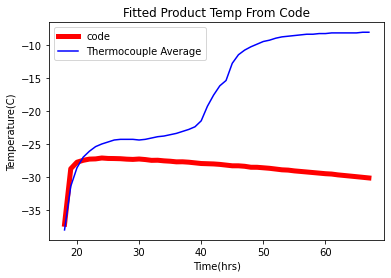

In [195]:
print("Fitted Temperature from OLS:\n",ols_fit()+5)
plt.plot(cycle_time,ols_fit()+5,color="red",linewidth=5,label="code")
plt.plot(cycle_time,(df2[[' SPLYO.TC_AVG.F_CV']]).values[strt_ind:stop_ind]+5,color="blue",label="Thermocouple Average")
plt.xlabel("Time(hrs)")
plt.ylabel("Temperature(C)")
plt.title("Fitted Product Temp From Code")
plt.legend()

Note: We will manually add 5 degrees to accommodate for the error in thermocouple calibration. 

In [196]:
#Function to calculate all intermediate values used to fit the T_product
def param(T_p):
    hf=(shelf_temp-T_p)*Kv_values
    sh=np.zeros(hf.size)
    for i in range(len(hf)):
        if i==0:
            sh[i]=0
        else:
            sh[i]=sh[i-1]+(hf[i]+hf[i-1])*(cycle_time[i]-cycle_time[i-1])*3600/2*Dout*Dout*np.pi/4
    msi=sh/676
    pdl=msi/(water_cont*ice_den*Din*Din*np.pi/4)
    cake_res=(cake_res_param[3,0]+((cake_res_param[3,1]*pdl)/(1+cake_res_param[3,2]*pdl)))/1000 #Want cake resistance in Torr
    Tice_surf=T_p-hf*(dry_cake-pdl)/lam
    return cake_res, Tice_surf, hf, msi, sh, pdl

In [197]:
#Calculate all outputs of our model using the fitted Tproduct 

#T product
T_p_model=ols_fit()+5
#Heat Flux
hf_model=param(ols_fit()+5)[2]
#Sublimation Heat
sh_model=param(ols_fit()+5)[4]
#Mass of Sublimed Ice 
msi_model=param(ols_fit()+5)[3]
#Product Dried Layer
pdl_model=param(ols_fit()+5)[5]
#Cake Resistance
cake_res_model=param(ols_fit()+5)[0]
#Tice_surf
Tice_model=param(ols_fit()+5)[1]
#Pressure(Experimental)
p_exp_model=cham_pres.reshape(-1)+(param(ols_fit()+5))[0]*3600*((Dout*Dout)/(Din*Din))*Kv_values*(shelf_temp-ols_fit()+5)/676
#Pressure(Theoretical)
p_theo_model=np.exp(24.01849-6144.96/((param(ols_fit()+5))[1].astype("float64")+273))

In [198]:
print(param(ols_fit()+5)[0])

[-0.44287235  2.38586456  3.24326636  3.63340589  3.86032457  4.00961703
  4.11542223  4.19452657  4.25614013  4.30542915  4.34581296  4.37951727
  4.40797435  4.4323494   4.45356524  4.47214861  4.48854742  4.5031545
  4.51624938  4.52803404  4.53868652  4.54839047  4.55727592  4.56542726
  4.5729182   4.57983269  4.58624704  4.59221936  4.59777843  4.60296108
  4.60782251  4.61238329  4.61666271  4.6206936   4.62450061  4.62810528
  4.6315171   4.63475124  4.63782411  4.64074488  4.64352464  4.64617343
  4.64870035  4.65111152  4.65341687  4.65562523  4.65774076  4.65976924
  4.66171598  4.66358588]


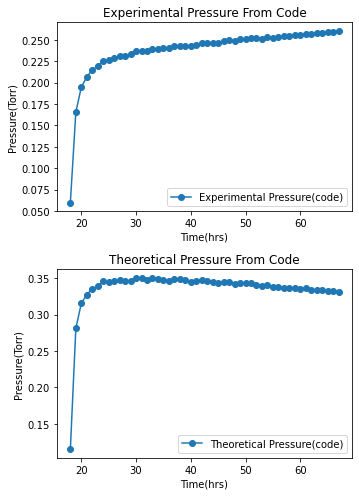

In [199]:
#Plot
plt.figure(figsize=(5, 7))
plt.subplot(2,1,1)
plt.plot(cycle_time,p_exp_model,marker="o",label="Experimental Pressure(code)")
plt.xlabel("Time(hrs)")
plt.ylabel("Pressure(Torr)")
plt.title("Experimental Pressure From Code")
plt.legend()
plt.subplot(2,1,2)
plt.plot(cycle_time,p_theo_model,marker="o",label="Theoretical Pressure(code)")
plt.xlabel("Time(hrs)")
plt.ylabel("Pressure(Torr)")
plt.title("Theoretical Pressure From Code")
plt.legend()
plt.tight_layout()

In [200]:
#### Checkpoint(SSE) #####

def sse(x1,x2):
    sse=[]
    for i in range(len(x1)):
        sse.append(math.pow(x1[i]-x2[i],2))
    sse=np.array(sse)
    return np.sum(sse)
print("SSE for Theoretical Vs Experimental Pressures(Model):",sse(p_theo_model,p_exp_model))

SSE for Theoretical Vs Experimental Pressures(Model): 0.4904701250631221


## Drying Time

In [201]:
#Sublimation Rate Function
def sub_rate(HF):
    sr=np.zeros(HF.size)
    for i in range(len(HF)):
        if i==0:
            sr[i]=0
        else:
            sr[i]=vial_numbers*HF[i]*np.pi*math.pow(Dout,2)/(4*676)
    return sr

In [202]:
#Sublimation Rate Calculation
sr=sub_rate(param(ols_fit()+5)[2]) #g/s
sr_kg=sr*3600/1000

In [203]:
#Percent Removed Water Function
def perc_wat():
    prw = ((((param(ols_fit()+5))[3]/water_cont)/fill_volume)/den)*100
    return prw 

In [204]:
#Percent Removed Water Calculation
prw_old=perc_wat()
ind=[]
for i in range(len(prw_old)):
    if prw_old[i]>100:
        ind.append(i)
prw=np.delete(prw_old,ind) #drop values that exceed 100
print(prw)

[ 0.          4.35774502  8.91748156 13.31765804 17.65900986 21.97344322
 26.26710264 30.55257816 34.84834665 39.1488808  43.46096153 47.7863555
 52.10892614 56.43409182 60.78456066 65.14799897 69.52065569 73.91180321
 78.32195089 82.7428033  87.17036711 91.61809832 96.09074287]


Pmin Parameters: [5.12 18.829 0]


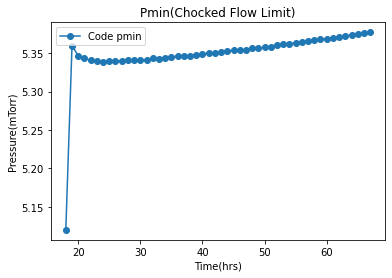

In [205]:
#Pmin (Chocked Flow) Calculation

#Load a,b,c parameters (these are the ones we will use for our model)
p_min_param=df1.iloc[3:6,13].values
print("Pmin Parameters:",p_min_param)
p_min_model=p_min_param[0]+p_min_param[1]*sr_kg+p_min_param[2]*sr_kg*sr_kg
plt.plot(cycle_time,p_min_model,marker="o",label="Code pmin")
plt.title("Pmin(Chocked Flow Limit)")
plt.xlabel("Time(hrs)")
plt.ylabel("Pressure(mTorr)")
plt.legend()

### Final Graphs Output

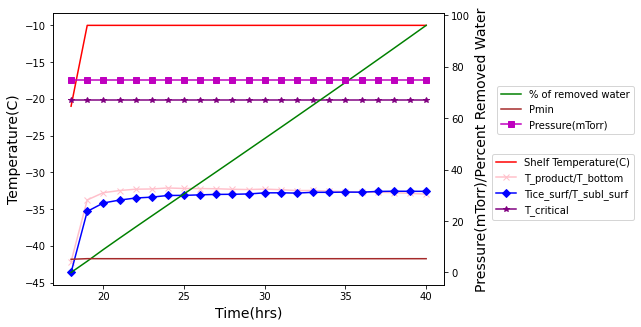

In [206]:
#Plot Final Graph For combined Pressures and Temperatures
pressure=75 #For LL Cycle
l=len(prw)
fig,ax = plt.subplots( figsize=(7,5) )
#Temperature axis
ax.plot(cycle_time[0:l],
        shelf_temp[0:l],
        color="red",label="Shelf Temperature(C)")
ax.plot(cycle_time[0:l],
        ols_fit()[0:l],
        color="pink",marker="x",label="T_product/T_bottom") #T_product/T_bottom
ax.plot(cycle_time[0:l],
        (param(ols_fit()))[1][0:l],
        color="blue",marker="D",label="Tice_surf/T_subl_surf") #Tice_surf/T_subl_surf
#Change this to real T critical
ax.plot(cycle_time[0:l],
        np.repeat(-20.1,cycle_time.shape[0])[0:l],
        color="purple",marker="*",label="T_critical") #Tcritical
ax.set_xlabel("Time(hrs)", fontsize = 14)
ax.set_ylabel("Temperature(C)", fontsize = 14)
plt.legend(bbox_to_anchor=(1.5,0.5))

#Pressure Axis
ax2=ax.twinx()
ax2.plot(cycle_time[0:l],prw,color="green",label="% of removed water") #Percent Removed Water
ax2.plot(cycle_time[0:l],p_min_model[0:l],color="brown",label="Pmin") #pmin
ax2.plot(cycle_time[0:l],np.repeat(pressure,cycle_time.shape[0])[0:l],color="m",marker="s",label="Pressure(mTorr)") #pressure

ax2.set_ylabel("Pressure(mTorr)/Percent Removed Water", fontsize = 14)
plt.legend(bbox_to_anchor=(1.5,0.75))
plt.show()

# save the plot as a file
#fig.savefig('Final_Output1.jpg',format='jpeg')

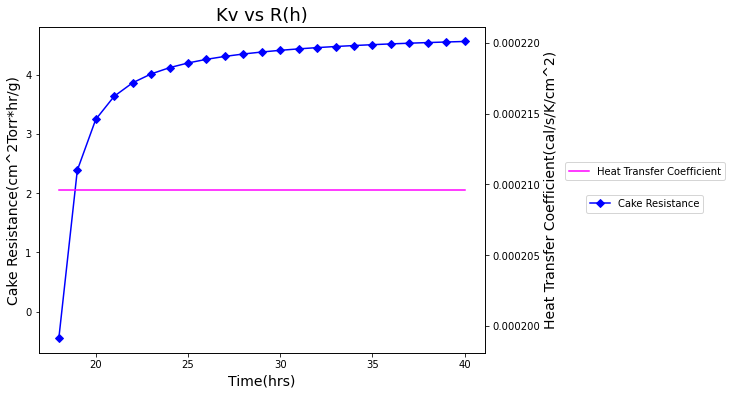

In [207]:
#Plot graph for Kv vs Rh
fig,ax = plt.subplots( figsize=(8,6) )
#Temperature axis
ax.plot(cycle_time[0:l],
        cake_res_model[0:l],
        color="blue",marker="D",label="Cake Resistance")
ax.set_xlabel("Time(hrs)", fontsize = 14)
ax.set_ylabel("Cake Resistance(cm^2Torr*hr/g)", fontsize = 14)
plt.legend(bbox_to_anchor=(1.5,0.5))
ax2=ax.twinx()
ax2.plot(cycle_time[0:l],Kv_values[0:l],color="magenta",label="Heat Transfer Coefficient") #Percent Removed Water
ax2.set_ylabel("Heat Transfer Coefficient(cal/s/K/cm^2)", fontsize = 14)
plt.legend(bbox_to_anchor=(1.55,0.6))
plt.title("Kv vs R(h)",fontsize=18)
plt.show()
# save the plot as a file
#fig.savefig('Final_Output2.jpg',format='jpeg')

In [208]:
#Extract Drying Time 

#Method 1: Using percent water removed
diff=[]
for i in range(len(prw)):
    if 100-prw[i]>0:
        diff.append(100-prw[i])
min_index=np.argmin(np.array(diff)) #Find index where percent of removed water is closest to 100
drying_time=cycle_time[min_index]
print("Drying Time Using Percent Removed Water:",drying_time,"(Hrs)")

# #Method 2: Using pirani and chamber pressure convergence
# drying_time_other=cycle_time[cycle_time.shape[0]-1] #Use stop index that indicated convergence of pressures
# print("Drying Time Using Pressure Convergence:",drying_time_other,"(Hrs)")

Drying Time Using Percent Removed Water: 40 (Hrs)
